Modulation Type: QPSK, SNR: 2, Shape: (1000, 2, 128)
Modulation Type: PAM4, SNR: 8, Shape: (1000, 2, 128)
Modulation Type: AM-DSB, SNR: -4, Shape: (1000, 2, 128)
Modulation Type: GFSK, SNR: 6, Shape: (1000, 2, 128)
Modulation Type: QAM64, SNR: 8, Shape: (1000, 2, 128)
Modulation Type: AM-SSB, SNR: 12, Shape: (1000, 2, 128)
Modulation Type: 8PSK, SNR: 8, Shape: (1000, 2, 128)
Modulation Type: 8PSK, SNR: 12, Shape: (1000, 2, 128)
Modulation Type: QAM64, SNR: -6, Shape: (1000, 2, 128)
Modulation Type: QAM16, SNR: 2, Shape: (1000, 2, 128)
Modulation Type: QAM16, SNR: -20, Shape: (1000, 2, 128)
Modulation Type: PAM4, SNR: -6, Shape: (1000, 2, 128)
Modulation Type: WBFM, SNR: -18, Shape: (1000, 2, 128)
Modulation Type: AM-DSB, SNR: 16, Shape: (1000, 2, 128)
Modulation Type: CPFSK, SNR: 10, Shape: (1000, 2, 128)
Modulation Type: WBFM, SNR: 6, Shape: (1000, 2, 128)
Modulation Type: BPSK, SNR: 4, Shape: (1000, 2, 128)
Modulation Type: BPSK, SNR: -2, Shape: (1000, 2, 128)
Modulation Type: QPSK, 

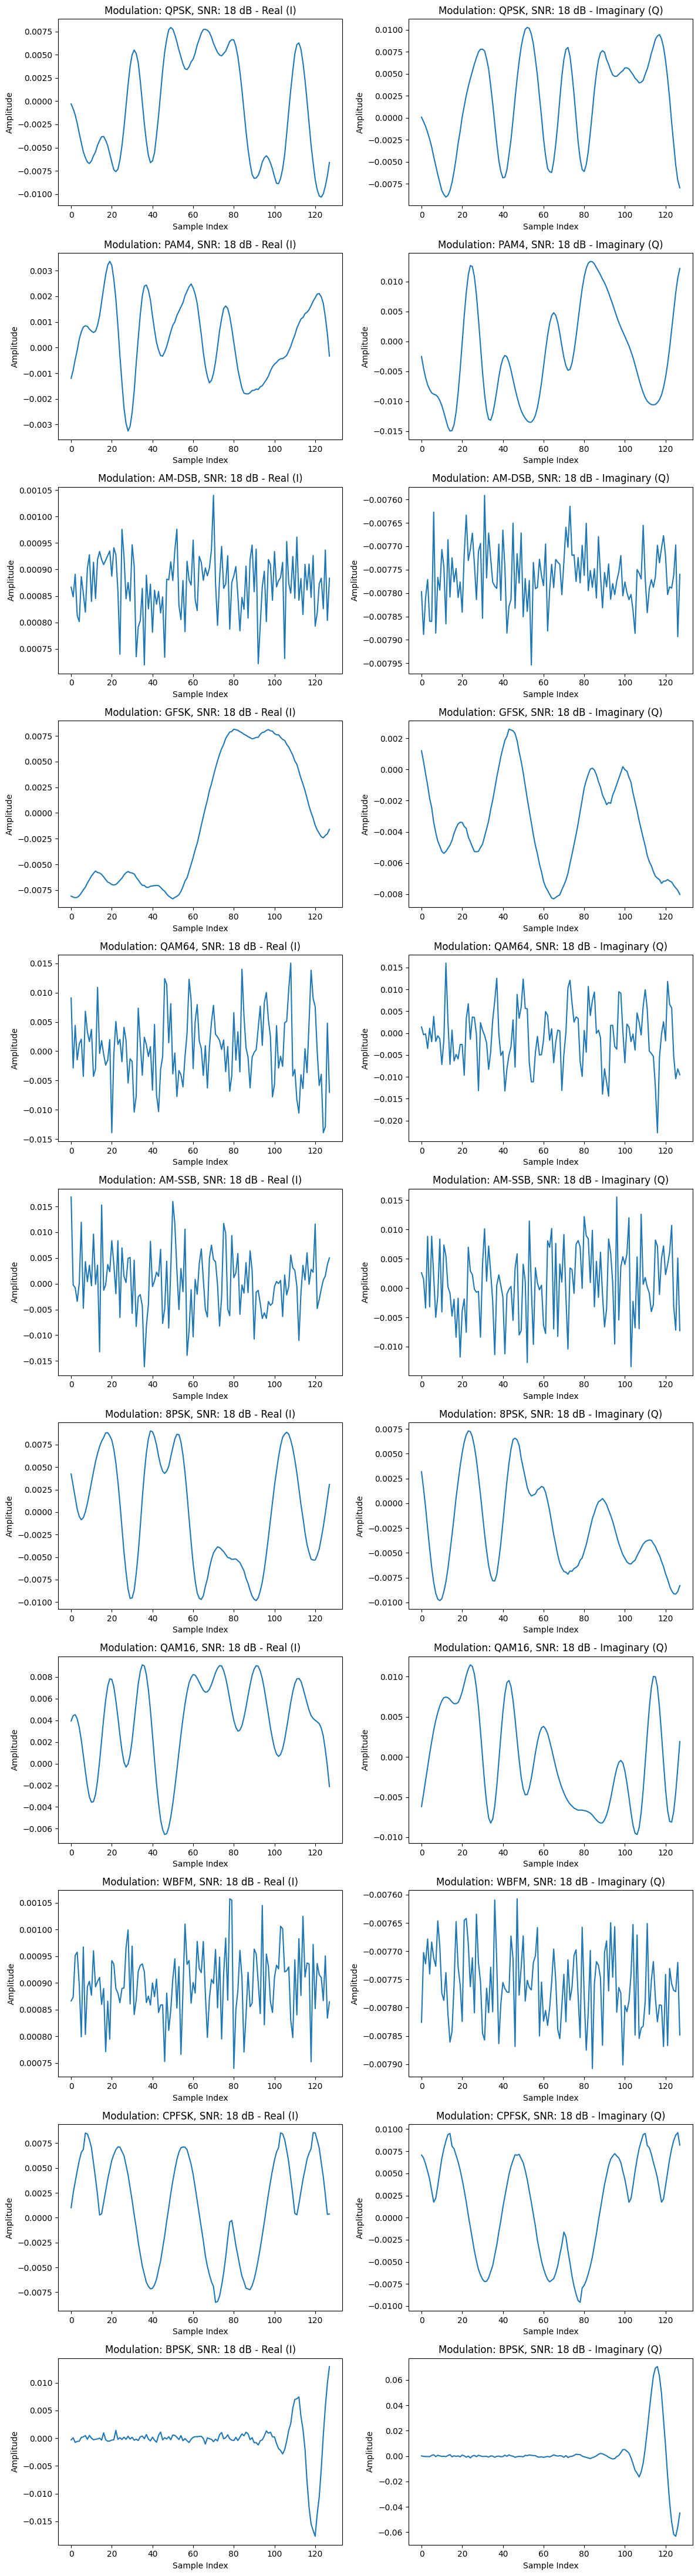

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Function to plot all highest SNR signals in one figure with separate subplots
def plot_all_highest_snr_signals(data):
    # Dictionary to store the highest SNR signal for each modulation type
    highest_snr_signals = {}
    
    # Find the highest SNR signal for each modulation type
    for key, signals in data.items():
        mod_type, snr = key
        if mod_type not in highest_snr_signals or snr > highest_snr_signals[mod_type][1]:
            highest_snr_signals[mod_type] = (signals[0], snr)  # Store the signal and its SNR

    # Create a figure and add subplots for each modulation type
    num_modulations = len(highest_snr_signals)
    fig, axs = plt.subplots(num_modulations, 2, figsize=(12, 4 * num_modulations))

    # Plot each modulation type's highest SNR signal
    for i, (mod_type, (signal, snr)) in enumerate(highest_snr_signals.items()):
        real_part = signal[0]  # I-component (real)
        imag_part = signal[1]  # Q-component (imaginary)

        # Plot real (I) component
        axs[i, 0].plot(real_part)
        axs[i, 0].set_title(f'Modulation: {mod_type}, SNR: {snr} dB - Real (I)')
        axs[i, 0].set_xlabel('Sample Index')
        axs[i, 0].set_ylabel('Amplitude')

        # Plot imaginary (Q) component
        axs[i, 1].plot(imag_part)
        axs[i, 1].set_title(f'Modulation: {mod_type}, SNR: {snr} dB - Imaginary (Q)')
        axs[i, 1].set_xlabel('Sample Index')
        axs[i, 1].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()
    
# Load the RML2016.10a_dict.pkl file with explicit encoding
with open('RML2016.10a_dict.pkl', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # Use 'latin1' encoding to avoid Unicode errors
    
# Print the modulation types and the shape of the data
for key, signals in data.items():
    mod_type, snr = key
    print(f"Modulation Type: {mod_type}, SNR: {snr}, Shape: {signals.shape}")

# Call the function to plot all highest SNR signals in one figure
plot_all_highest_snr_signals(data)
